In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('regression_dataset.csv')
data.head()

,cases,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,density_per_km,precipMM
0,2,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
1,0,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
2,1,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
3,0,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,0.505636,0.0
4,1,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,0.505636,0.0


In [ ]:
#feature selection
X = data[['maxtempC', 'mintempC', 'windspeedKmph', 'year', 'month', 'density_per_km', 'precipMM', 'cloudcover',
       'humidity','DewPointC', 'latitude', 'longitude','FeelsLikeC', 'winddirDegree', 'sunHour']]
y = data['cases']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
#import essential libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
np.set_printoptions(suppress=True)

In [ ]:
#empty array for storing the training and testing scores
Training_Accuracy_Before = []
Testing_Accuracy_Before = []
Training_Accuracy_After = []
Testing_Accuracy_After = []
Models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']

#Basic models

In [ ]:
logreg = LinearRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
print(train_score)
test_score = logreg.score(X_test, y_test)
print(test_score)

Training_Accuracy_Before.append(train_score)
Testing_Accuracy_Before.append(test_score)

0.007808784228439558
0.006736076941831759


In [ ]:
# Checking for alpha from .0001 to 1 and finding the best value for alpha
alpha_space = np.logspace(-4, 0, 30)   
alpha_space

array([0.0001    , 0.00013738, 0.00018874, 0.00025929, 0.00035622,
       0.00048939, 0.00067234, 0.00092367, 0.00126896, 0.00174333,
       0.00239503, 0.00329034, 0.00452035, 0.00621017, 0.00853168,
       0.01172102, 0.01610262, 0.02212216, 0.03039195, 0.04175319,
       0.05736153, 0.07880463, 0.10826367, 0.14873521, 0.20433597,
       0.28072162, 0.38566204, 0.52983169, 0.72789538, 1.        ])

In [ ]:
#storing the ridge scores for each of the alpha values
ridge_scores = []
ridge = Ridge(normalize = True)
for alpha in alpha_space:
    ridge.alpha = alpha
    val = np.mean(cross_val_score(ridge, X, y, cv = 10))
    ridge_scores.append(val)

In [ ]:
#storing the lasso scores for each of the alpha values
lasso_scores = []
lasso = Lasso(normalize = True)
for alpha in alpha_space:
    lasso.alpha = alpha
    val = np.mean(cross_val_score(lasso, X, y, cv = 10))
    lasso_scores.append(val)

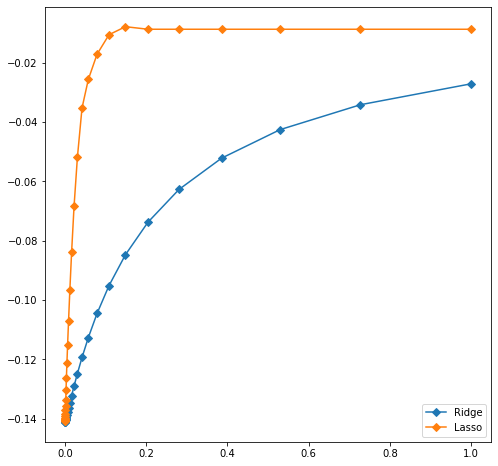

In [ ]:
#checking the trend of scores with alpha values
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, ridge_scores, marker = 'D', label = "Ridge")
plt.plot(alpha_space, lasso_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

From the chart we can see that, scores increases with increase in alpha value.

#Hypertuning Lasso and Ridge models

###Lasso

In [ ]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.013848863713938746}
0.005827436440729606


In [ ]:
# Using value of alpha as 0.013848863713938746 to get best accuracy for Lasso Regression
lasso = Lasso(alpha = 0.013848863713938746, normalize = True)
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
print(train_score)
test_score = lasso.score(X_test, y_test)
print(test_score)

Training_Accuracy_Before.append(train_score)
Testing_Accuracy_Before.append(test_score)


0.007165783343863752
0.006093679895370241


###Ridge

In [ ]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.27185882427329455}
0.006153743556846947


In [ ]:
# Using value of alpha as 0.27185882427329455 to get best accuracy for Ridge Regression
ridge = Ridge(alpha = 0.27185882427329455, normalize = True)
ridge.fit(X_train, y_train)

train_score = ridge.score(X_train, y_train)
print(train_score)
test_score = ridge.score(X_test, y_test)
print(test_score)

Training_Accuracy_Before.append(train_score)
Testing_Accuracy_Before.append(test_score)

0.0069999170400697475
0.006256087608942695


###Checking for best features

In [ ]:
coefficients = lasso.coef_
coefficients

array([ 0.        ,  1.12426025,  5.32508453,  1.39240069,  1.83468587,
       86.94760741, -0.        ,  0.        , -0.92882601,  0.        ,
        0.95276589,  4.75693983,  0.        ,  0.03862058, -7.16348937])

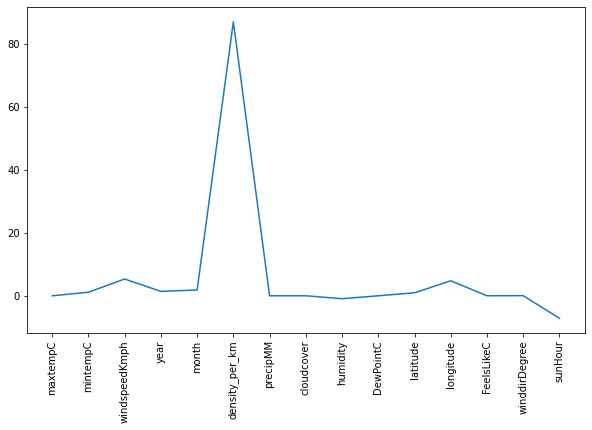

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(len(X_train.columns)), coefficients)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
plt.show()

In [ ]:
X_train.columns

Index(['maxtempC', 'mintempC', 'windspeedKmph', 'year', 'month',
       'density_per_km', 'precipMM', 'cloudcover', 'humidity', 'DewPointC',
       'latitude', 'longitude', 'FeelsLikeC', 'winddirDegree', 'sunHour'],
      dtype='object')

###Training the models with updated features

In [ ]:
#Removing the features whose coefficient values are 0.
X_mod = data[['mintempC', 'windspeedKmph', 'year', 'month', 'density_per_km', 'humidity', 'latitude', 'longitude', 'winddirDegree', 'sunHour']]
y_mod = data.cases

In [ ]:
Xmod_train, Xmod_test, ymod_train, ymod_test = train_test_split(X_mod, y_mod, test_size = 0.2, random_state = 10)

In [ ]:
#Linear Regression
logregmod = LinearRegression()
logregmod.fit(Xmod_train, ymod_train)

train_score1 = logregmod.score(Xmod_train, ymod_train)
print(train_score1)
test_score1 = logregmod.score(Xmod_test, ymod_test)
print(test_score1)

Training_Accuracy_After.append(train_score1)
Testing_Accuracy_After.append(test_score1)

0.007628321459259735
0.006271652590478349


In [ ]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

paramss = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lassomod = Lasso(normalize=True)
lassomod_model = GridSearchCV(lassomod, paramss, cv = 10)
lassomod_model.fit(Xmod_train, ymod_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.013848863713938746}
0.005827436440729606


In [ ]:
# Using value of alpha as  0.009545484566618348 to get best accuracy for Lasso Regression
lassomod = Lasso(alpha = 0.009545484566618348, normalize = True)
lassomod.fit(Xmod_train, ymod_train)

train_score2 = lassomod.score(Xmod_train, ymod_train)
print(train_score2)
test_score2 = lassomod.score(Xmod_test, ymod_test)
print(test_score2)

Training_Accuracy_After.append(train_score2)
Testing_Accuracy_After.append(test_score2)

0.007408585175250782
0.006259451388210824


In [ ]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridgemod = Ridge(normalize=True)
ridgemod_model = GridSearchCV(ridgemod, params, cv = 10)
ridgemod_model.fit(Xmod_train, ymod_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.27185882427329455}
0.006153743556846947


In [ ]:
# Using value of alpha as 0 0.2718588242732945 to get best accuracy for Ridge Regression
ridgemod = Ridge(alpha =  0.2718588242732945, normalize = True)
ridgemod.fit(Xmod_train, ymod_train)

train_score3 = ridgemod.score(Xmod_train, ymod_train)
print(train_score3)
test_score3 = ridgemod.score(Xmod_test, ymod_test)
print(test_score3)

Training_Accuracy_After.append(train_score3)
Testing_Accuracy_After.append(test_score3)

0.006993581044568931
0.006203816356250003


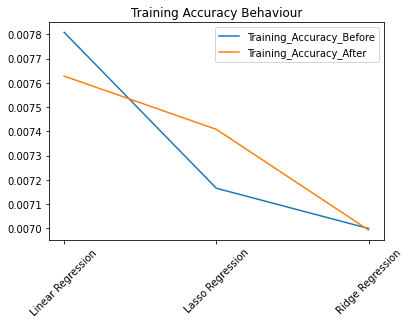

In [ ]:
plt.plot(Training_Accuracy_Before, label = 'Training_Accuracy_Before')
plt.plot(Training_Accuracy_After, label = 'Training_Accuracy_After')
plt.xticks(range(len(Models)), Models, Rotation = 45)
plt.title('Training Accuracy Behaviour')
plt.legend()
plt.show()

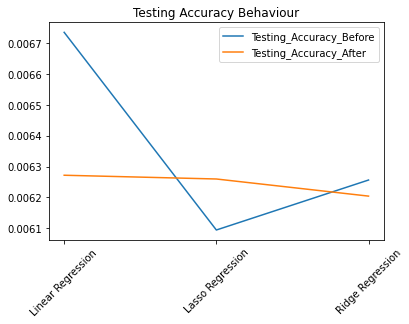

In [ ]:
plt.plot(Testing_Accuracy_Before, label = 'Testing_Accuracy_Before')
plt.plot(Testing_Accuracy_After, label = 'Testing_Accuracy_After')
plt.xticks(range(len(Models)), Models, Rotation = 45)
plt.title('Testing Accuracy Behaviour')
plt.legend()
plt.show()

###MSE of test dataset

####Before

In [ ]:
X_train.shape, X_test.shape

((82436, 15), (20609, 15))

In [ ]:
pred_lin = logreg.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_ridge = ridge.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_lin = mean_squared_error(y_test, pred_lin)
mse_lasso = mean_squared_error(y_test, pred_lasso)
mse_ridge = mean_squared_error(y_test, pred_ridge)

print('Linear:', mse_lin)
print('Lasso:', mse_lasso)
print('Ridge:', mse_ridge)

Linear: 482209.82664447534
Lasso: 482521.6975996364
Ridge: 482442.85189348576


####After

In [ ]:
pred_linmod = logregmod.predict(Xmod_test)
pred_lassomod = lassomod.predict(Xmod_test)
pred_ridgemod = ridgemod.predict(Xmod_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_linmod = mean_squared_error(ymod_test, pred_linmod)
mse_lassomod = mean_squared_error(ymod_test, pred_lassomod)
mse_ridgemod = mean_squared_error(ymod_test, pred_ridgemod)

print('Linear:', mse_linmod)
print('Lasso:', mse_lassomod)
print('Ridge:', mse_ridgemod)

Linear: 482435.2954053522
Lasso: 482441.2188457326
Ridge: 482468.22854425723
